In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [2]:
input_dir= r"images/sheet/input sheets/"  
cropped_dir_path = r"images/sheet/table/" 
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):  
        img_for_box_extraction_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_for_box_extraction_path, 0)
        
        if img is not None:
            (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            
            if img_bin is not None:
                img_bin = 255 - img_bin
                #cv2.imwrite(os.path.join(cropped_dir_path, "inverted_" + filename), img_bin)

                v_kernel_length = np.array(img).shape[1] // 2000
                h_kernel_length = np.array(img).shape[1] // 1000
                verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length))
                hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1))
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

                img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
                verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
                #cv2.imwrite(os.path.join(cropped_dir_path, "verticle_lines_" + filename), verticle_lines_img)

                img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
                horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
                #cv2.imwrite(os.path.join(cropped_dir_path, "horizontal_lines_" + filename), horizontal_lines_img)

                alpha = 0.5
                beta = 1.0 - alpha

                img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
                img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
                (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                cv2.imwrite(os.path.join(cropped_dir_path, "image_final_bin_" + filename), img_final_bin)
                
                #plt.imshow(img_final_bin, cmap='gray')
                
                contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filterengine.hpp:367: error: (-215:Assertion failed) anchor.inside(Rect(0, 0, ksize.width, ksize.height)) in function 'cv::normalizeAnchor'


In [3]:
input_dir= r"images/sheet/input sheets/"  
cropped_dir_path = r"images/sheet/table/" 
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):  
        img_for_box_extraction_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_for_box_extraction_path, 0)
        
        if img is not None:
            (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            
            if img_bin is not None:
                img_bin = 255 - img_bin
                #cv2.imwrite(os.path.join(cropped_dir_path, "inverted_" + filename), img_bin)

v_kernel_length = np.array(img).shape[1] // 2000
h_kernel_length = np.array(img).shape[1] // 1000

# Ensure the kernel length is at least 1
v_kernel_length = max(1, v_kernel_length)
h_kernel_length = max(1, h_kernel_length)

# Create structuring elements with anchor point at the center
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length), anchor=(0, v_kernel_length // 2))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1), anchor=(h_kernel_length // 2, 0))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
 #cv2.imwrite(os.path.join(cropped_dir_path, "verticle_lines_" + filename), verticle_lines_img)

img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
#cv2.imwrite(os.path.join(cropped_dir_path, "horizontal_lines_" + filename), horizontal_lines_img)

alpha = 0.5
beta = 1.0 - alpha

img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite(os.path.join(cropped_dir_path, "image_final_bin_" + filename), img_final_bin)
                
#plt.imshow(img_final_bin, cmap='gray')
                
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

                

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\filterengine.hpp:367: error: (-215:Assertion failed) anchor.inside(Rect(0, 0, ksize.width, ksize.height)) in function 'cv::normalizeAnchor'


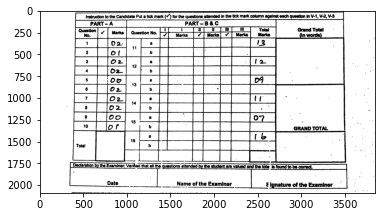

In [6]:
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):  # Assuming all image files have the .jpg extension
        img_for_box_extraction_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_for_box_extraction_path, 0)
        
        if img is not None:
            (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            
            if img_bin is not None:
                img_bin = 255 - img_bin
                cv2.imwrite(os.path.join(cropped_dir_path, "inverted_" + filename), img_bin)

                v_kernel_length = np.array(img).shape[1] // 2000
                h_kernel_length = np.array(img).shape[1] // 1000
                verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length))
                hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1))
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

                img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
                verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
                cv2.imwrite(os.path.join(cropped_dir_path, "verticle_lines_" + filename), verticle_lines_img)

                img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
                horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
                cv2.imwrite(os.path.join(cropped_dir_path, "horizontal_lines_" + filename), horizontal_lines_img)

                alpha = 0.5
                beta = 1.0 - alpha

                img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
                img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
                (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                cv2.imwrite(os.path.join(cropped_dir_path, "img_final_bin_" + filename), img_final_bin)
                
                plt.imshow(img_final_bin, cmap='gray')
                
                contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
print(hierarchy)

In [ ]:
plt.imshow(img_final_bin)
cv2.imshow("sheet",img_final_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()

Separating contours for the 2 marks in the table

In [ ]:
idx = 0
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if ( 900 > x and y>50 and 160>w>140 and 80>h>60):
    
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx)+ ' '+ str(w)+" "+str(h) + '.jpg', new_img)
        

        #plt.figure(figsize=(40, 10))
        #plt.subplot(5,2, 10)
        #plt.imshow(new_img, cmap='gray')
        #cv2.imshow("Current Crop", new_img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    #else:
     #   print("Threshholding operation failed")
        

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # bounding the images
    if   x>400 and w > 150 and h>150:
        table_image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 14)
plt.imshow(table_image, cmap='gray')

In [ ]:
plt.imshow(img_final_bin, cmap='gray')

Separating contours for the 13 and 16 marks in the table

In [ ]:
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if ( 1800 < x and y>50 and 250>w>180 and 80>h>60 ):
    
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx)+ ' '+ str(w)+" "+str(h) + '.jpg', new_img)
        

        plt.figure(figsize=(40, 10))
        plt.subplot(5,2, 10)
        plt.imshow(new_img, cmap='gray')
        #cv2.imshow("Current Crop", new_img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    #else:
        #print("Threshholding operation failed")